<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A00819192/blob/main/Actividad6_A00819192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Descarga los datos  y carga el dataset en tu libreta.  



In [1]:
#Librerias
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Carga de datos 
df = pd.read_csv('/content/data.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


# 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()


In [3]:
df.shape

(30000, 24)

In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [8]:
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [9]:
df.isnull().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

# 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [10]:
#Copia por si pasa algo
df_main = df.copy()
df_main.head()
name = df_main.columns
print(name)
Mean = []
#sacamos los promedios 
for n in name:
  Mean.append(df_main[n].mean()) #using Append to save these values in a list
print(Mean)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')
[167484.32266666667, 1.603753458448615, 1.8530568704580306, 1.551903460230682, 35.484214035672615, -0.016634996833016634, -0.13368894815802634, -0.16640549461541027, -0.22079957320529492, -0.26634204909284953, -0.29113586340292136, 51236.86274967488, 49190.73466937877, 47025.35015173242, 43275.65232616308, 40324.49397992196, 38881.135745248415, 5662.945885569485, 5922.488913340669, 5225.623399573219, 4827.252525926173, 4800.2972089766245, 5216.259976662777, 0.2211887855452212]


In [11]:
#LLenamos espacios vacios
name = df_main.columns
#Se utiliza un ciclo, para recorrer cada columna e ir llenando los valores vacios
for n in range(0,len(name)):
  j=name[n]
  df_main[j].fillna(value = Mean[n], inplace = True)
  
df_main

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [12]:
#verificamos que no hay valores na
df_main.isna().any()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool


#4 .Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión


In [13]:
df_main.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489117,0.790293,0.521950,9.217256,1.123773,1.197154,1.195908,1.168977,1.132994,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# 5. Realiza el conteo de las variables categóricas

ID X2 - Gender X3 - Education X4 - Martial Status X6-x11 - History of past payment



In [14]:
Categoricas = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
nom_cat = ['Gender','Education','Marital status','History of past payment']
i = 0
for x in Categoricas:
  if x == 'X2':
    print("Variable {0}: \n".format(nom_cat[0]) )
  if x == 'X3':
    print("Variable {0}: \n".format(nom_cat[1]) )
  if x == 'X4':
    print("Variable {0}: \n".format(nom_cat[2]) )
  if x == ('X6') or x == ('X7') or x == ('X8') or x == ('X9') or x == ('X10') or x == ('X11'): 
    print("Variable {0}: \n".format(nom_cat[3]) )

  print("{1}\n\n".format(x, df_main[x].value_counts()))

Variable Gender: 

2.000000    18112
1.000000    11887
1.603753        1
Name: X2, dtype: int64


Variable Education: 

2.000000    14030
1.000000    10585
3.000000     4915
5.000000      280
4.000000      123
6.000000       51
0.000000       14
1.853057        2
Name: X3, dtype: int64


Variable Marital status: 

2.000000    15964
1.000000    13657
3.000000      323
0.000000       54
1.551903        2
Name: X4, dtype: int64


Variable History of past payment: 

 0.000000    14736
-1.000000     5684
 1.000000     3688
-2.000000     2759
 2.000000     2667
 3.000000      322
 4.000000       76
 5.000000       26
 8.000000       19
 6.000000       11
 7.000000        9
-0.016635        3
Name: X6, dtype: int64


Variable History of past payment: 

 0.000000    15728
-1.000000     6047
 2.000000     3927
-2.000000     3782
 3.000000      326
 4.000000       99
 1.000000       28
 5.000000       25
 7.000000       20
 6.000000       12
-0.133689        5
 8.000000        1
Name: X7, dtype:

# 6. Escala los datos, si consideras necesario


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized = scaler.fit_transform(df_main)

n_df = pd.DataFrame(normalized, columns=df_main.columns)
n_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.136720,0.810140,0.185938,-1.057405,-1.245968,1.794552,1.782331,-0.697050,-0.666577,-1.530182,...,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426,1.876533
1,-0.365981,0.810140,0.185938,0.858519,-1.028980,-0.875071,1.782331,0.139148,0.188886,0.235082,...,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922,1.876533
2,-0.597202,0.810140,0.185938,0.858519,-0.161028,0.014803,0.111674,0.139148,0.188886,0.235082,...,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165,-0.532951
3,-0.905498,0.810140,0.185938,-1.057405,0.164454,0.014803,0.111674,0.139148,0.188886,0.235082,...,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174,-0.532951
4,-0.905498,-1.234395,0.185938,-1.057405,2.334333,-0.875071,0.111674,-0.697050,0.188886,0.235082,...,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231,-0.532951


#7.Reduce las dimensiones con PCA, si consideras necesario.

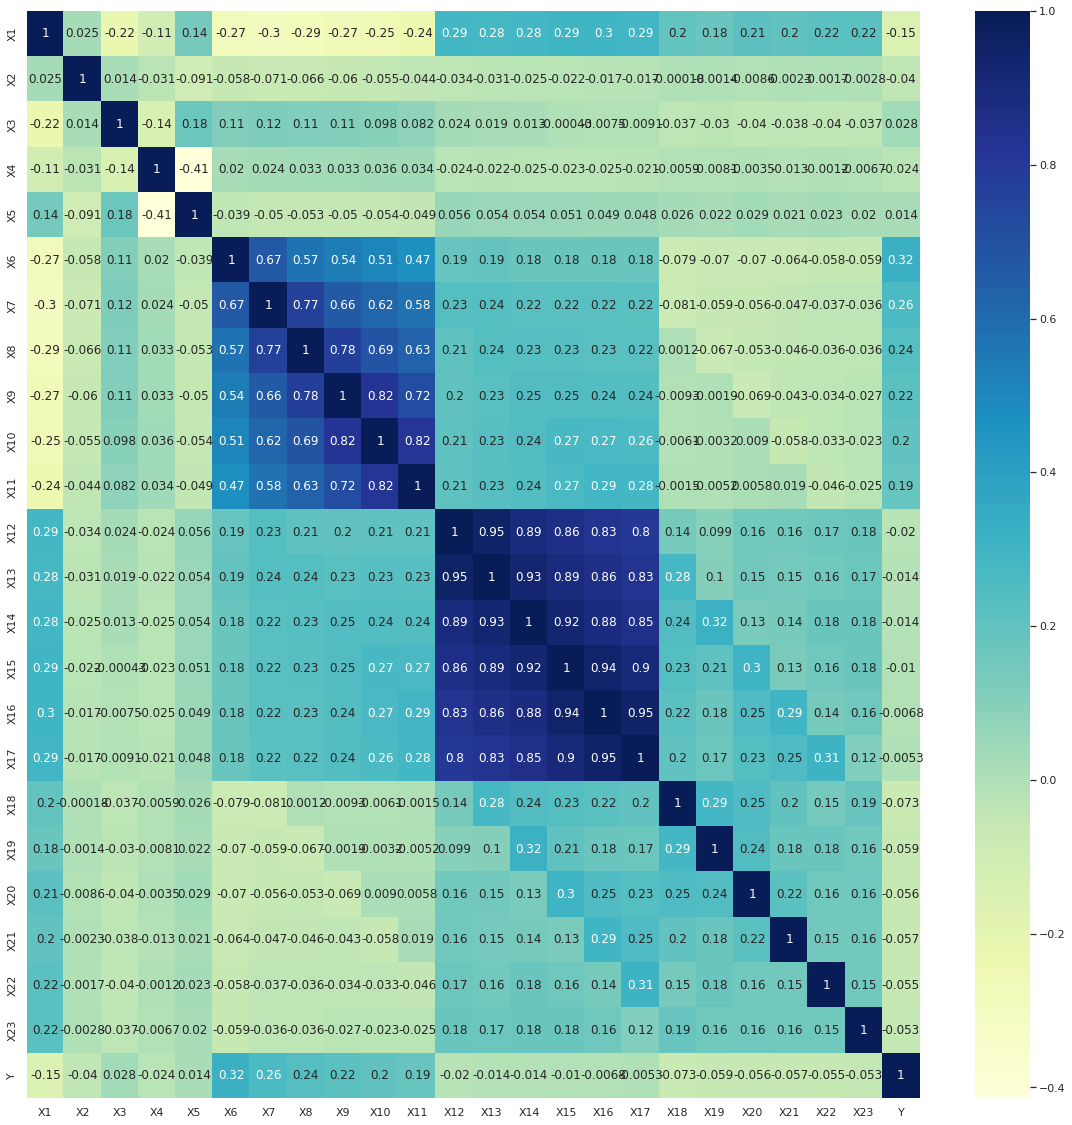

In [17]:
nmatriz = df_main.corr()
sns.set(rc={'figure.figsize':(20,20)}) 
sns.heatmap(nmatriz, cmap = 'YlGnBu', annot=True,)

In [21]:
minimos = 5
pca = PCA(n_components=minimos)
pca_data = pca.fit_transform(df_main)


print('Varainza de cada componente minimo\n')
Sdf = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                             'Proportion of variance': pca.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
                             })
pcs_df = Sdf.transpose()
pcs_df
#valores estadisticos
pcs_df.columns = ['PC{}'.format(i) for i in range(1, len(pcs_df.columns) + 1)]
pcs_df.round(4)

Varainza de cada componente minimo



,PC1,PC2,PC3,PC4,PC5
Standard deviation,166510.5351,115825.4358,37235.0850,27729.8903,20686.2185
Proportion of variance,0.6104,0.2954,0.0305,0.0169,0.0094
Cumulative proportion,0.6104,0.9058,0.9363,0.9532,0.9627


In [23]:
pcs_df2 = pd.DataFrame(pca.components_.transpose(), 
                                columns = pcs_df.columns,
                                index = df_main.columns
                                )
pcs_df2

,PC1,PC2,PC3,PC4,PC5
X1,4.916578e-01,8.689857e-01,-2.055609e-02,-1.842453e-02,-4.411466e-02
X2,-3.569783e-08,1.765324e-07,3.256825e-07,-2.475105e-08,-3.653934e-07
X3,-3.672504e-07,-1.499292e-06,-9.721406e-07,2.074045e-07,4.510916e-07
X4,-1.927434e-07,-4.014926e-07,7.463279e-08,9.611017e-08,6.612567e-07
X5,5.571529e-06,8.304235e-06,-4.138691e-06,-2.780889e-07,-4.902486e-06
X6,3.420626e-07,-3.803677e-06,-4.113854e-07,-2.628530e-06,-3.365169e-06
X7,5.677016e-07,-4.622600e-06,-5.798637e-07,-2.670130e-06,-2.037793e-06
X8,5.821752e-07,-4.497310e-06,5.131277e-07,-1.787310e-06,-3.624489e-06
X9,6.649094e-07,-4.258500e-06,2.101671e-06,2.258581e-07,-4.429904e-06
X10,7.583977e-07,-4.030316e-06,3.455873e-06,-8.750861e-07,-4.188393e-06


In [24]:
names = pcs_df2.columns
x = 1
for n in names:
 print(f"Variable con mas peso en PC{x}:", pcs_df2[n].idxmax(axis=0, skipna=False))
 x+=1

Variable con mas peso en PC1: X1
Variable con mas peso en PC2: X1
Variable con mas peso en PC3: X17
Variable con mas peso en PC4: X19
Variable con mas peso en PC5: X21


#8. Elabora los histogramas de los atributos para visualizar su distribución


In [33]:
X_new =pcs_df.columns
X_new

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')

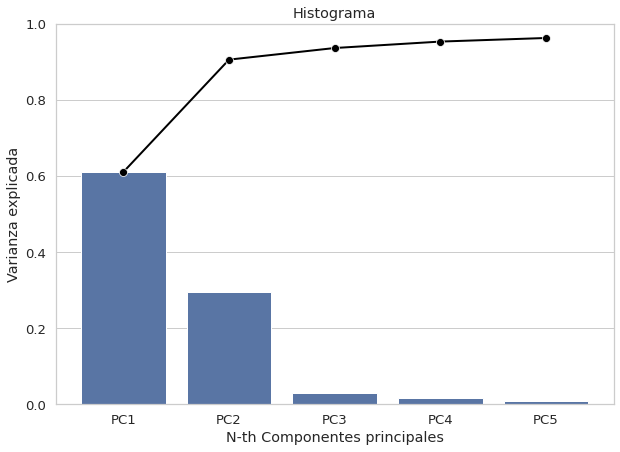

In [34]:
PC_components = pcs_df.columns
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Histograma')
plt.xlabel('N-th Componentes principales')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

#9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17']
X1


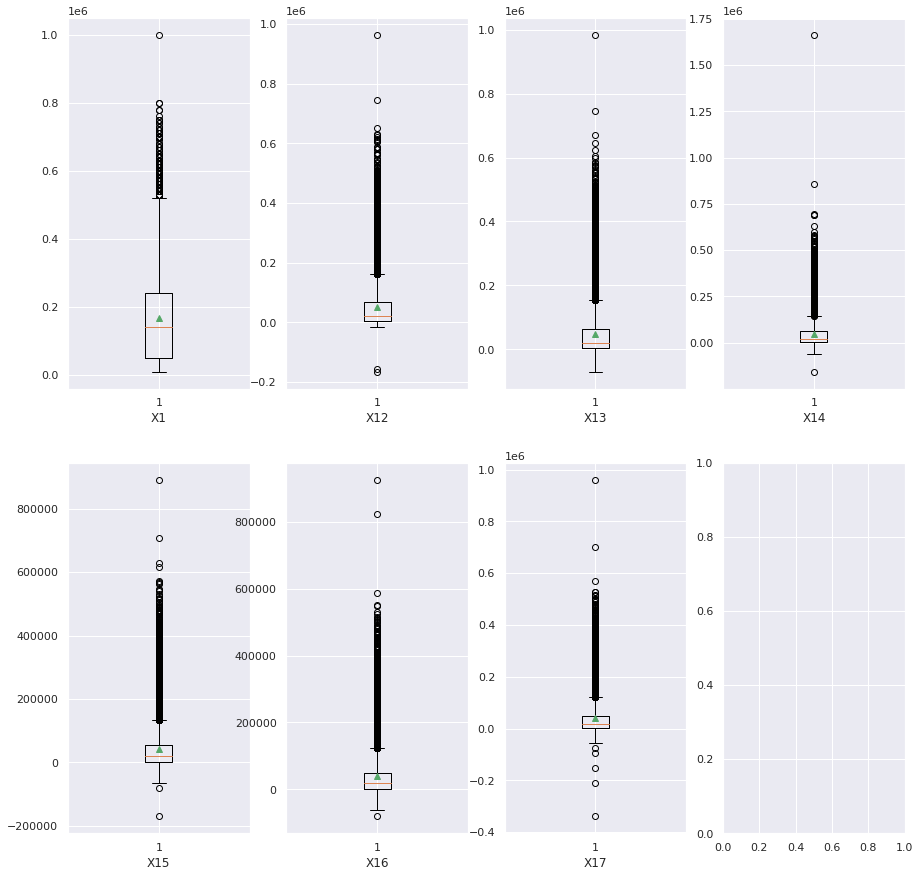

In [38]:
sns.set(rc={'figure.figsize':(15,15)})
nombres = ['X1','X12', 'X13', 'X14', 'X15',
       'X16', 'X17']
print(nombres)

fig, axes = plt.subplots(2, 4)
k=0
print(nombres[0])
for name in nombres:
  plt.subplot(2,4,k+1) 
  plt.boxplot(df_main[name], showmeans=True)
  plt.xlabel(name)
  k+=1

plt.show()

In [48]:
df_main.X2.value_counts().sort_index(ascending = True)

1.000000    11887
1.603753        1
2.000000    18112
Name: X2, dtype: int64

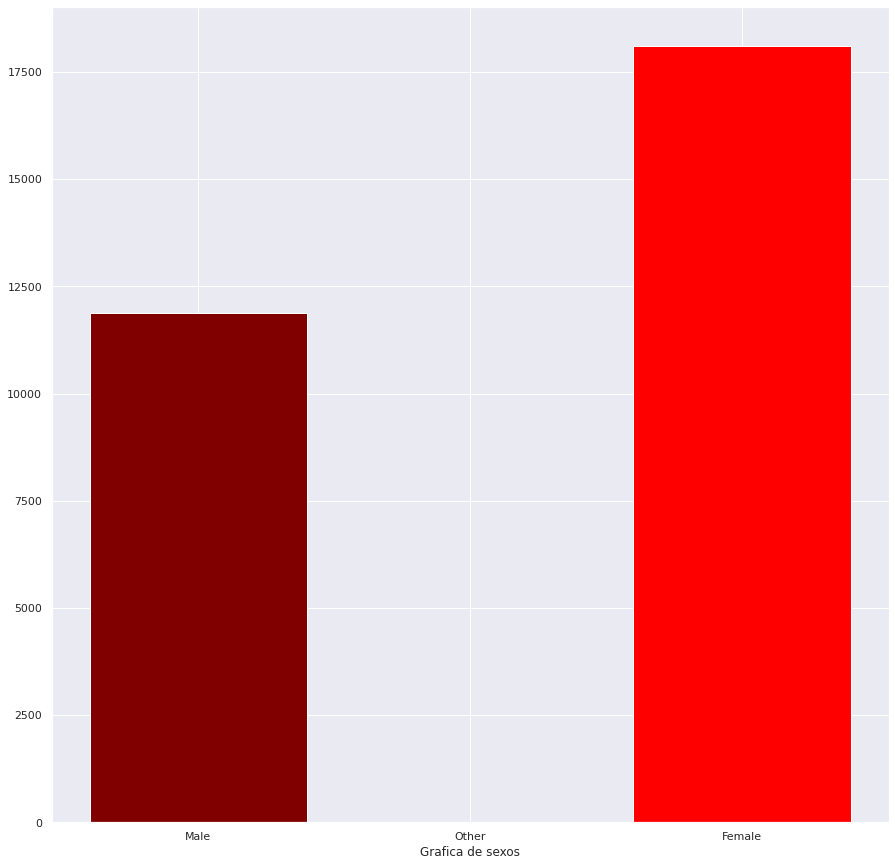

In [49]:
sns.set(rc={'figure.figsize':(15,15)})
genero_label = ['Male','Other','Female']

plt.bar(genero_label, df_main.X2.value_counts().sort_index(ascending = True),color = ['maroon','green','red'])
plt.xlabel('Gender')
  
plt.show()

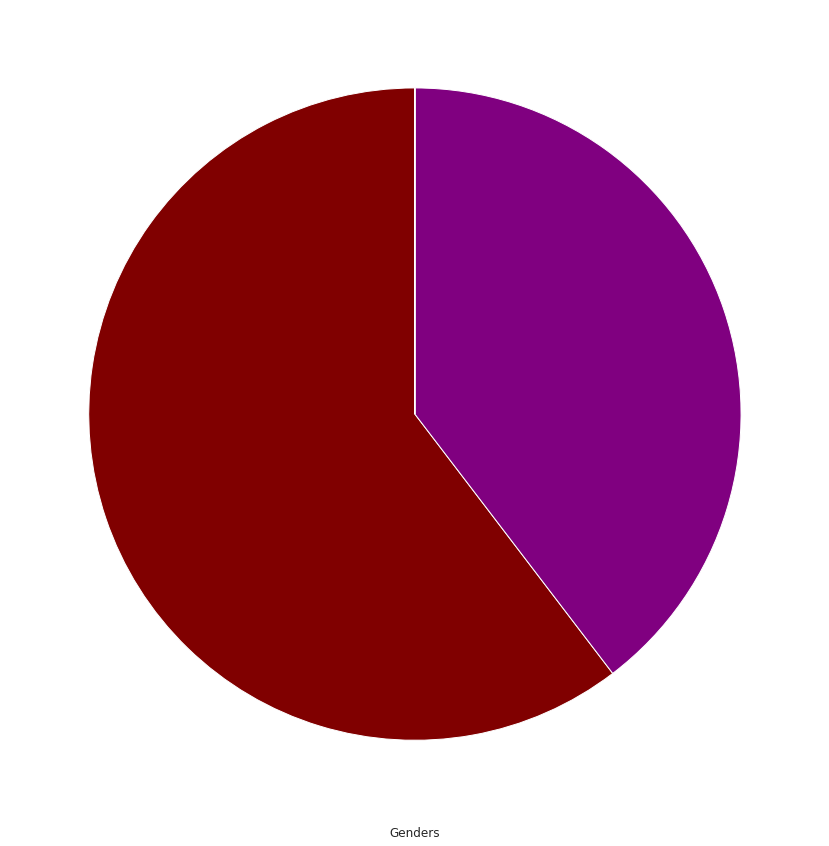

In [58]:
y = np.array(df_main.X2.value_counts())
mylabels = ['Male', 'Female']
mycolors = ['maroon','purple']

plt.pie(y, startangle = 90,colors = mycolors)
plt.xlabel('Genders')
plt.show()



# 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

La primera grafica nos muestra como los datos no estan muy bien distribuidos, esto nos indica que es necesario tratar los datos antes de utilizarlos.
Los siguientes graficos son mas simples y solo nos plasman informacion del data set, 
